# Perbaikan Citra (Histogram)


In [ ]:
from google.colab import drive

# mounting dataset from gdrive
drive.mount('/content/gdrive', force_remount=True)

# dataset path
root_path = 'gdrive/My Drive/Colab Notebooks/Pengolahan_Citra_04/Lab04 Data/'

print("Path root : ", root_path)

Mounted at /content/gdrive
Path root :  gdrive/My Drive/Colab Notebooks/Pengolahan_Citra_04/Lab04 Data/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_image(image_path):
  bgr_img = cv2.imread(image_path)
  rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
  return rgb_img

def show_image(rgb_img):
  plt.figure(figsize=(10,20))
  plt.imshow(rgb_img)
  plt.axis('off')

(-0.5, 3085.5, 3953.5, -0.5)

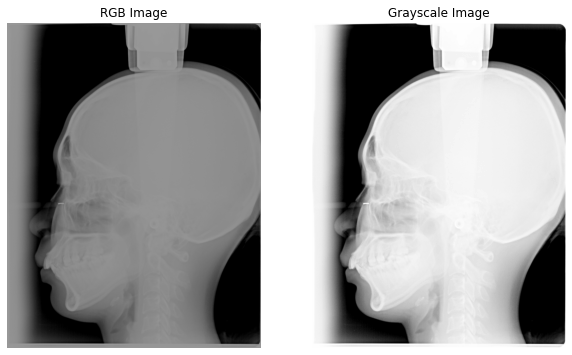

In [ ]:
rgb_img = read_image(root_path + 'test1.jpg')
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

# show image sample
ax1 = plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap="gray")
plt.title('Grayscale Image')
plt.axis('off')

Image size :  (3954, 3086)
Histogram shape :  (256, 1)


(0.0, 256.0)

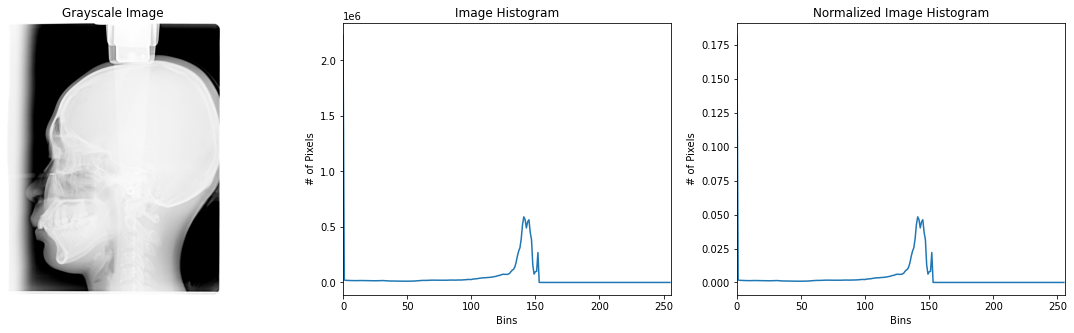

In [ ]:
# compute histogram using OpenCV
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# check the shape of the histogram
print("Image size : ", gray_img.shape)
print("Histogram shape : ", hist.shape)

# normalize histogram
total_num_pixels = gray_img.shape[0]*gray_img.shape[1]
norm_hist = hist/total_num_pixels

# show images
ax1 = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(gray_img, cmap="gray")
plt.title('Grayscale Image')
plt.axis('off')

# show the histogram
plt.subplot(1,3,2)
plt.title("Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# show the normalized histogram
plt.subplot(1,3,3)
plt.title("Normalized Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(norm_hist)
plt.xlim([0, 256])

In [ ]:
# Histogram Equalization
def histogram_equalization(img):
  # manual computation of histogram equalization
  # step 1: compute the histogram
  hist, bins = np.histogram(img.flatten(), 256, [0, 256])

  # step 2: compute the cumulative sum of histogram
  cdf = hist.cumsum()

  # step 3: normalize the cumulative sum histogram
  cdf_nomalized = cdf * hist.max() / cdf.max()
  cdf_m = np.ma.masked_equal(cdf, 0)

  # step 4: mapping the new pixel according to the distribution
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
  cdf = np.ma.filled(cdf_m, 0).astype('uint8')

  return cdf[img]

(0.0, 256.0)

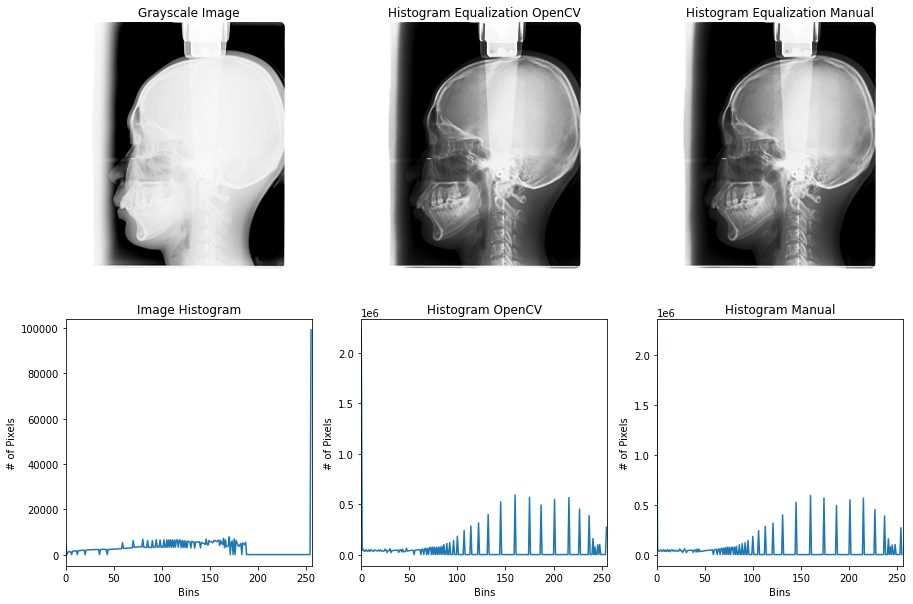

In [ ]:
# apply histogram equalization using OpenCV
hist_equalization_cv_img = cv2.equalizeHist(gray_img)
hist_equalization_cv_bar = cv2.calcHist([hist_equalization_cv_img], [0], None, [256], [0, 256])

# apply histogram equalization using manual compuatation
hist_equalization_man_img = histogram_equalization(gray_img)
hist_equalization_man_bar, hist_equalization_man_bin = np.histogram(hist_equalization_man_img.flatten(), 256, [0, 256])

# plot the result
# show images
ax1 = plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(gray_img, cmap="gray")
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(hist_equalization_cv_img, cmap="gray")
plt.title('Histogram Equalization OpenCV')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(hist_equalization_man_img, cmap="gray")
plt.title('Histogram Equalization Manual')
plt.axis('off')

# show the histogram
plt.subplot(2,3,4)
plt.title("Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

plt.subplot(2,3,5)
plt.title("Histogram OpenCV")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_equalization_cv_bar)
plt.xlim([0, 256])

plt.subplot(2,3,6)
plt.title("Histogram Manual")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_equalization_man_bar)
plt.xlim([0, 256])

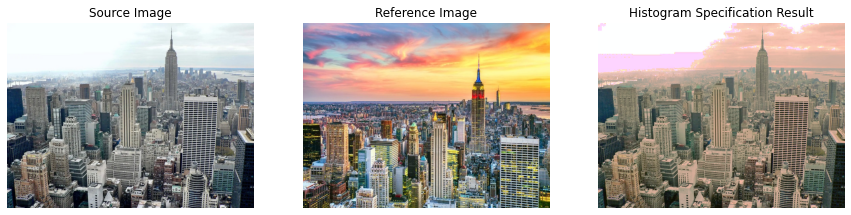

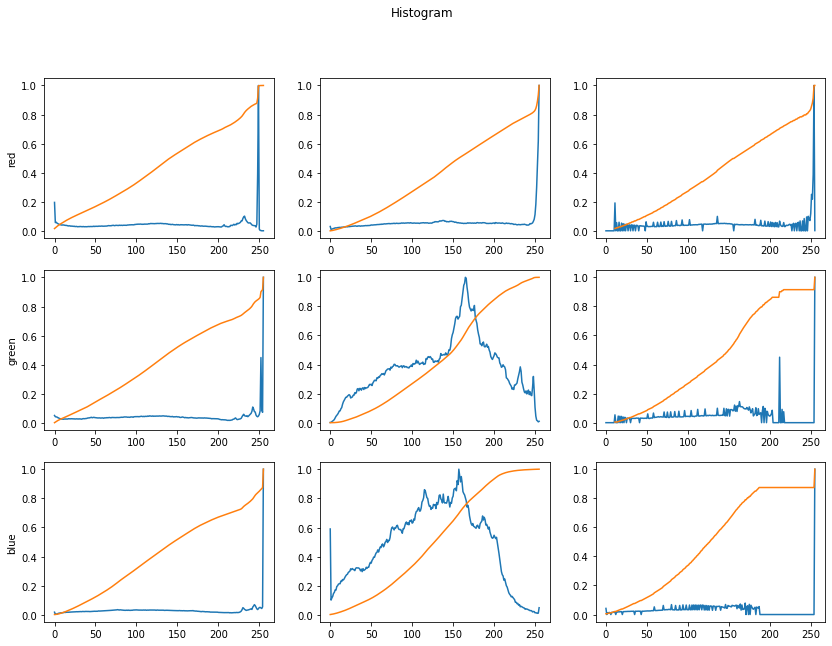

In [ ]:
# Histogram Specification
from skimage import exposure

# source image
source_img = read_image(root_path + 'test2.jpg')
# target image to match the histogram
target_img = read_image(root_path + 'test3.jpg')

# detect multichannel
isRGB = True if source_img.shape[-1] > 1 else False

# perform histogram specification using skimage library
hist_specification_img = exposure.match_histograms(source_img,target_img, multichannel=isRGB)

# plot the result
# show images
ax1 = plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(source_img)
plt.title('Source Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(target_img)
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(hist_specification_img)
plt.title('Histogram Specification Result')
plt.axis('off')

# construct a figure to display the histogram plots
# before amd after histogram matching was applied
(fig, axs) = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
plt.suptitle('Histogram')
# loop over our source image, reference image, and output
for(i, image) in enumerate((source_img, target_img, hist_specification_img)):
  # loop over the names of the channels in RGB order
  for(j, color) in enumerate(("red", "green", "blue")):
    # compute a histogram for the current channel and plot it
    (hist, bins) = exposure.histogram(image[..., j], source_range="dtype")
    axs[j, i].plot(bins, hist / hist.max())
    # compute the cumulative distribution function for the
    # current channel and plot it
    (cdf, bins) = exposure.cumulative_distribution(image[..., j])
    axs[j, i].plot(bins, cdf)
    # set the y-axis label of the current plot to be the name
    # of the c
    axs[j, 0].set_ylabel(color)


Terapkan histogram equalization pada citra RGB (source_img) yang ada di Langkah 12 seperti pada langkah praktikum 10.

(0.0, 256.0)

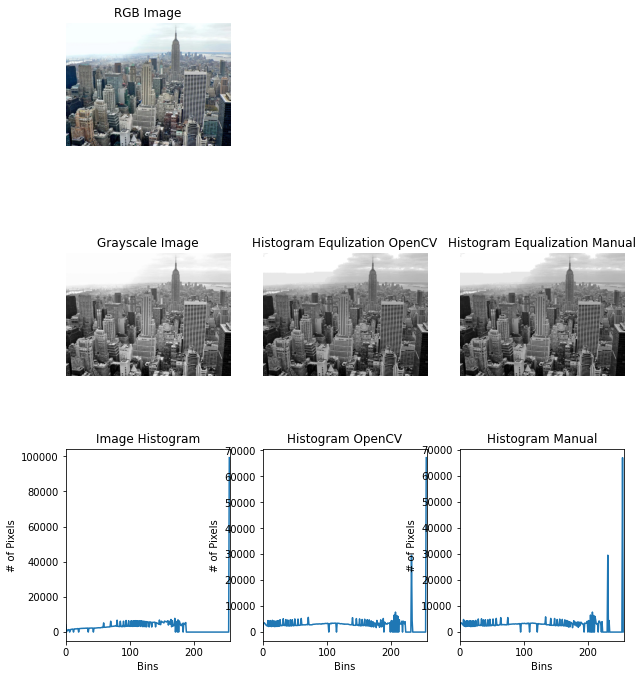

In [ ]:
source_img_gray = cv2.cvtColor(source_img, cv2.COLOR_RGB2GRAY)
# apply histogram equalization using OpenCV
hist_equalization_cv_source_img = cv2.equalizeHist(source_img_gray)
hist_equalization_cv_bar_source_img = cv2.calcHist([hist_equalization_cv_source_img], [0], None, [256], [0, 256])

# apply histogram equalization using manual compuatation
hist_equalization_man_source_img = histogram_equalization(source_img_gray)
hist_equalization_man_bar_source_img, hist_equalization_man_bin_source_img = np.histogram(hist_equalization_man_source_img.flatten(), 256, [0, 256])

# show image sample
ax1 = plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
plt.imshow(source_img)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(3,3,4)
plt.imshow(source_img_gray, cmap="gray")
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(hist_equalization_cv_source_img, cmap="gray")
plt.title('Histogram Equlization OpenCV')
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(hist_equalization_man_source_img, cmap="gray")
plt.title('Histogram Equalization Manual')
plt.axis('off')

# show the histogram
plt.subplot(3,3,7)
plt.title("Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0,256])

plt.subplot(3,3,8)
plt.title("Histogram OpenCV")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_equalization_cv_bar_source_img)
plt.xlim([0,256])

plt.subplot(3,3,9)
plt.title("Histogram Manual")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_equalization_man_bar_source_img)
plt.xlim([0,256])